# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *12장 오토인코더와 잠재 표현 학습*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 12장 미니 프로젝트 C1 차원축소: 데이터 분포 가시화

#### 1. 데이터 준비와 오토인코더 만들기

In [ ]:
# tf.keras를 임포트한다
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있다. 학습용과 테스트용으로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
                                    fashion_mnist.load_data()
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
enc_cnn = models.Sequential([
      layers.Conv2D(filters=16, kernel_size=3, activation='elu',
                    input_shape=(28,28,1)),
      layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
      layers.Flatten(),
      layers.Dense(128, activation='elu')])
enc_cnn.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
Total params: 1,182,256
Trainable params: 1,182,256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dec_cnn = models.Sequential([
     layers.Dense(9216, input_shape=(128, ), activation='elu'),
     layers.Reshape(target_shape=(24,24,16)),
     layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
     layers.Conv2DTranspose(filters=1, kernel_size=3, activation='elu')])
dec_cnn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 9216)              1188864   
_________________________________________________________________
reshape_2 (Reshape)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 26, 26, 16)        2320      
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 1,191,329
Trainable params: 1,191,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')
AE_CNN.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 128)               1182256   
_________________________________________________________________
sequential_10 (Sequential)   (None, 28, 28, 1)         1191329   
Total params: 2,373,585
Trainable params: 2,373,585
Non-trainable params: 0
_________________________________________________________________


#### 2. 훈련을 통해 잠재 표현 생성 능력 만들기

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 1859.6737
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 651.8502
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 537.6434
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 486.5651
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 450.7458
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 429.6997
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 412.5350
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 397.0612
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 389.1368
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 378.3839
Epoch 11/15
1875/1875 [==============================] - 7s 4ms/step - loss: 371.3620
Epoch 12/15
1875/1875 [==============================] - 7s 4m

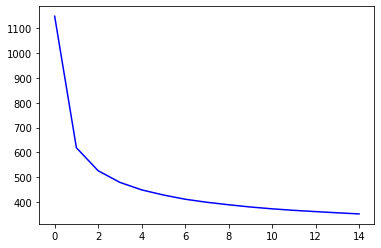

In [ ]:
X_cnn = train_images.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X_cnn, X_cnn, epochs = 15)
plt.plot(history.history['loss'], 'b-')

#### 3. 잠재 표현의 차원 축소화 기사화

In [ ]:
from sklearn import manifold
TSNE = manifold.TSNE(n_components=2)

In [ ]:
latent_representation = enc_cnn.predict(X_cnn[:3000])
embedding = TSNE.fit_transform(latent_representation)

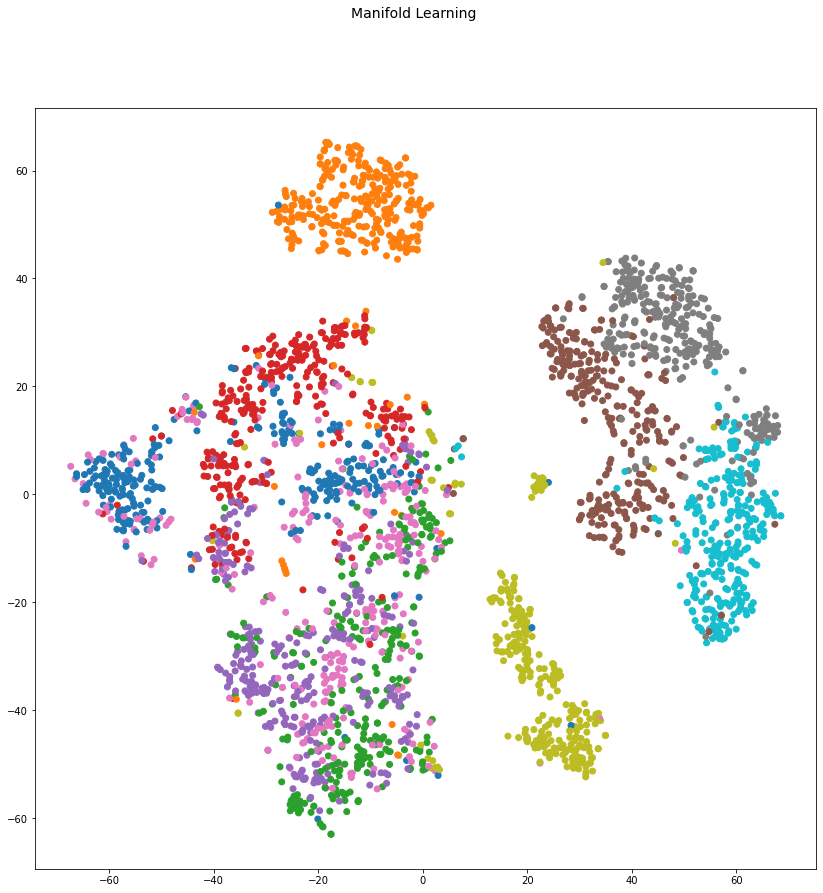

In [ ]:
fig = plt.figure(figsize = (14, 14))
fig.suptitle("Manifold Learning", fontsize=14)
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c=train_labels[:3000], cmap='tab10')
plt.show()